<a href="https://colab.research.google.com/github/lidiasalves/projeto_desenvovlimento_tdsv3/blob/main/Trabalho_TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

days = 100 ##range da quantidade de dias que irão ser retornados. Obs: essa API gratuíta limita até 100 dias.
url = f'https://www.okx.com/api/v5/market/history-candles?instId=BTC-USDT&limit={days}&bar=1D' #retorna o volume e preço de fechamento do gráfico diário bitcoin dos ultimos 30 dias

response = requests.get(url); #realiza a requisicao HTTP para a API da OKX, retornando o status, consequentemente os dados caso a requisição for bem sucedida

bitcoin = {
    'timestamp': [],
    'close_price': [],
    'btc_volume': [],
    'usdt_volume': [],
}

if response.status_code == 200 and response.json()['code'] == '0' :
  data = response.json()['data'] #recebe os dados caso a requisicao for bem sucedida
else:
  print(f'Erro na requisicao: \nStatus Code: {response.status_code} \n{response.json()["msg"]}') #printa o ero da requisicao, caso mal sucedida

if data:
  for item in data:
    timestamp = datetime.utcfromtimestamp(int(item[0]) / 1000)  #converte de milissegundos para segundos
    formated_timestamp = timestamp.strftime("%d-%m-%Y")
    close_price = round(float(item[4]), 1) #converte para float, uma casa decimal
    btc_volume = round(float(item[5]), 2) #converte para float, duas casas decimais
    usdt_volume = btc_volume * close_price #converte o volume em bitcoin para USDT. (volume em bitcoin * preço do bitcoin)
    usdt_volume = "{:.2f}".format(usdt_volume) #remove a notação cientifica que vem por padrão do python ao lidar com numeros grandes

    bitcoin['timestamp'].append(formated_timestamp)
    bitcoin['close_price'].append(close_price)
    bitcoin['btc_volume'].append(btc_volume)
    bitcoin['usdt_volume'].append(usdt_volume)

  bitcoin_df = pd.DataFrame(bitcoin) #usa o pandas para criar o dataframe usando os dados acima
  bitcoin_df.columns = ['Data(GMT+8)','Preço','Volume(BTC)','Volume(USDT)'] #renomea as colunas


#apresentando base de dados
print("Toda a base de dados:")
display(bitcoin_df)

#Apresentar o tamanho do DataFrame
print("\n\nTamanho do DataFrame:")
print(f"Linhas: {bitcoin_df.shape[0]}, Colunas: {bitcoin_df.shape[1]}")

#Acessar uma linha específica e apresentar suas características
line_x = 2  # Defina o valor de x (o número da linha a ser acessada)
print(f"\n\nCaracterísticas da linha {line_x}:")
print(bitcoin_df.iloc[line_x])

#Verificar se o dataframe está vazio
print("\n\nVerificando se o DataFrame está vazio:")
print(bitcoin_df.empty)

#Apresentar os 5 primeiros registros da base de dados
print("\n\nPrimeiros 5 registros:")
display(bitcoin_df.head())

#Excluir um item (linha) do DataFrame
line_to_exclude = 1  # Defina a linha a ser excluída
bitcoin_df = bitcoin_df.drop(index = line_to_exclude)
print(f"\n\nDataFrame após exclusão da linha { line_to_exclude }:")
display(bitcoin_df)

# 7. Adicionar um item (linha) ao DataFrame
new_line = ['31-10-2024', 69225.4, 4990.44, 312463174.13]
bitcoin_df.loc[ len(bitcoin_df) + 1 ] = new_line #cria uma linha após a última, e recebe os dados de nova_linha
print("\n\nDataFrame após adicionar uma nova linha:")
display(bitcoin_df)

# 8. Transpor uma coluna para uma linha
print("\n\nDataFrame após transposição:")
display(bitcoin_df.T)

# 9. Apresentar somente a 1ª e 2ª colunas do DataFrame
print("\n\nSomente as colunas 1 e 2:")
display(bitcoin_df.iloc[: , :2])




Toda a base de dados:


,Data(GMT+8),Preço,Volume(BTC),Volume(USDT)
0,08-02-2025,96488.7,2937.97,283480905.94
1,07-02-2025,95855.6,5638.85,540515350.06
2,06-02-2025,98302.1,9588.19,942539212.20
3,05-02-2025,97338.6,6877.12,669409232.83
4,04-02-2025,98114.6,9829.71,964438064.77
...,...,...,...,...
95,05-11-2024,74296.4,30369.04,2256310343.46
96,04-11-2024,69632.1,10628.57,740089649.10
97,03-11-2024,68645.5,6845.03,469880506.87
98,02-11-2024,68100.0,5924.12,403432572.00




Tamanho do DataFrame:
Linhas: 100, Colunas: 4


Características da linha 2:
Data(GMT+8)       06-02-2025
Preço                98302.1
Volume(BTC)          9588.19
Volume(USDT)    942539212.20
Name: 2, dtype: object


Verificando se o DataFrame está vazio:
False


Primeiros 5 registros:


,Data(GMT+8),Preço,Volume(BTC),Volume(USDT)
0,08-02-2025,96488.7,2937.97,283480905.94
1,07-02-2025,95855.6,5638.85,540515350.06
2,06-02-2025,98302.1,9588.19,942539212.20
3,05-02-2025,97338.6,6877.12,669409232.83
4,04-02-2025,98114.6,9829.71,964438064.77




DataFrame após exclusão da linha 1:


,Data(GMT+8),Preço,Volume(BTC),Volume(USDT)
0,08-02-2025,96488.7,2937.97,283480905.94
2,06-02-2025,98302.1,9588.19,942539212.20
3,05-02-2025,97338.6,6877.12,669409232.83
4,04-02-2025,98114.6,9829.71,964438064.77
5,03-02-2025,99355.3,13214.69,1312949489.36
...,...,...,...,...
95,05-11-2024,74296.4,30369.04,2256310343.46
96,04-11-2024,69632.1,10628.57,740089649.10
97,03-11-2024,68645.5,6845.03,469880506.87
98,02-11-2024,68100.0,5924.12,403432572.00




DataFrame após adicionar uma nova linha:


,Data(GMT+8),Preço,Volume(BTC),Volume(USDT)
0,08-02-2025,96488.7,2937.97,283480905.94
2,06-02-2025,98302.1,9588.19,942539212.20
3,05-02-2025,97338.6,6877.12,669409232.83
4,04-02-2025,98114.6,9829.71,964438064.77
5,03-02-2025,99355.3,13214.69,1312949489.36
...,...,...,...,...
96,04-11-2024,69632.1,10628.57,740089649.10
97,03-11-2024,68645.5,6845.03,469880506.87
98,02-11-2024,68100.0,5924.12,403432572.00
99,01-11-2024,69391.3,5559.10,385753175.83




DataFrame após transposição:


,0,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Data(GMT+8),08-02-2025,06-02-2025,05-02-2025,04-02-2025,03-02-2025,02-02-2025,01-02-2025,31-01-2025,30-01-2025,29-01-2025,...,09-11-2024,08-11-2024,07-11-2024,06-11-2024,05-11-2024,04-11-2024,03-11-2024,02-11-2024,01-11-2024,31-10-2024
Preço,96488.7,98302.1,97338.6,98114.6,99355.3,98831.9,99348.2,102074.3,105438.0,105564.0,...,79687.3,76321.2,76418.8,76056.3,74296.4,69632.1,68645.5,68100.0,69391.3,69225.4
Volume(BTC),2937.97,9588.19,6877.12,9829.71,13214.69,28649.1,6364.26,7410.79,6888.84,10286.63,...,13082.59,6235.04,10343.69,12139.15,30369.04,10628.57,6845.03,5924.12,5559.1,4990.44
Volume(USDT),283480905.94,942539212.20,669409232.83,964438064.77,1312949489.36,2831444986.29,632277775.33,756451201.70,726345511.92,1085897809.32,...,1042516274.11,475865734.85,790452377.37,923258834.14,2256310343.46,740089649.10,469880506.87,403432572.00,385753175.83,312463174.13




Somente as colunas 1 e 2:


,Data(GMT+8),Preço
0,08-02-2025,96488.7
2,06-02-2025,98302.1
3,05-02-2025,97338.6
4,04-02-2025,98114.6
5,03-02-2025,99355.3
...,...,...
96,04-11-2024,69632.1
97,03-11-2024,68645.5
98,02-11-2024,68100.0
99,01-11-2024,69391.3


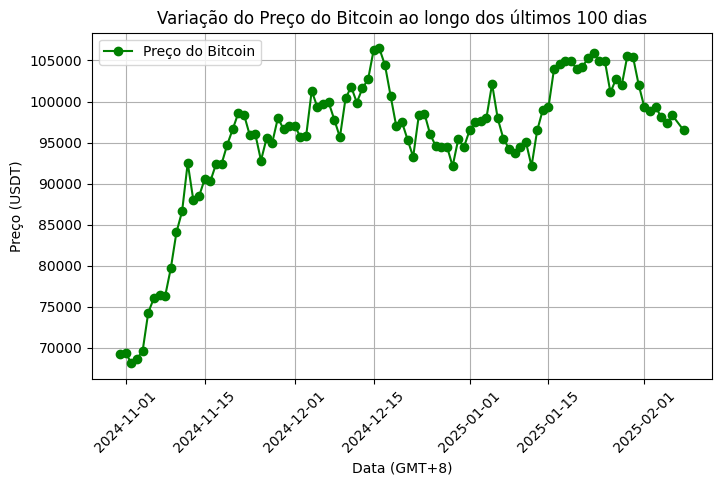

In [ ]:
# Desenvolvemos esse projeto como parte da análise dos valores do Bitcoin nos últimos 100 dias, coletando dados de uma API pública de uma corretora
# que fornece informações financeiras. Primeiramente foi criado uma estrutura de lista, definindo as colunas. Depois foi realizado o consumo da API,
# retornando os dados. Com os dados alocados, foi preciso realizar o tratamento de tipagem, e formatação da data usando o módulo datetime do python.
# A partir dos dados da API, que retornou Volume(BTC) e Preço, tomamos liberdade para criar uma nova coluna a partir dessas informações; a coluna Volume(USDT),
# recebendo o valor a partir da multiplicação do preço e volume em bitcoin.
# Após tratar todos os dados, foi gerado um dataframe a partir da lista populada, utilizando a biblioteca pandas.
# Encontramos algumas barreiras, como a formatação da data que inicialmente tinha o valor na unidade (Timestamp Unix), e também na questão #7 ao criar uma nova
# linha, nos deparamos com dificuldades ao tentar usar o método .append(), consequentemente descobrimos que o método foi descontinuado e não está mais presente
# nas versões atuais do pandas.



# No final, geramos um gráfico usando Matplotlib para visualizar as variações no valor de fechamento do Bitcoin durante o período dos últimos 100 dias.
# Baseado no gráfico abaixo, pode-se notar uma disparada no preço do bitcoin no final de 2024, atingindo a máxima de 107.000$.
# Desde então, o preço tem variado entre 92.000$ e 105.000$, mostrando um período de consolidação do mercado.











# Aqui está o gráfico que fiz sobre a variação dos preços de fechamento do Bitcoin:
from matplotlib import pyplot as plt

# Convertendo a coluna 'Data(GMT+8)' para datetime
bitcoin_df['Data(GMT+8)'] = pd.to_datetime(bitcoin_df['Data(GMT+8)'], format='%d-%m-%Y')

# Ordenando os dados por data (caso não estejam)
bitcoin_df = bitcoin_df.sort_values(by='Data(GMT+8)')

# Criando o gráfico de preço ao longo do tempo
plt.figure(figsize=(8, 4.5)) #dimensao do tamanho do grafico
plt.plot(bitcoin_df['Data(GMT+8)'], bitcoin_df['Preço'], marker='o', linestyle='-', color='green', label='Preço do Bitcoin')

# Formatando o gráfico
plt.xlabel('Data (GMT+8)') # Define o nome do rótulo das datas.
plt.ylabel('Preço (USDT)') # Define o nome do rótulo dos preços.
plt.title('Variação do Preço do Bitcoin ao longo dos últimos 100 dias') # Título do gráfico
plt.xticks(rotation=45)  # Rotacionar datas para melhor visualização
plt.legend() # Exibe as legendas, nesse caso: "Preço do Bitcoin", pois é a única linha existente no gráfico
plt.grid() # Cria as linhas de fundo do gráfico, para melhorar a visibilidade

# Exibir gráfico
plt.show()